# Process the SVI imagery for facade images 

using the colab notebook https://colab.research.google.com/drive/1Cjwe7j31VxnA6zZviIazpnPb9PggNAcm#scrollTo=9uKYKxD2QD10

filteres well to buildings. there is still some end buildings. could thinkg about doing facade segmentation and filtering those that dont have a majrity facade? Maybe test zookming in on the image 

### some tricky labels:
- campus (specifically for edlo) 
- balcony/ exterior 
- courtyard 

- oast house - currently included 


# to do: go back to the modelling prediction and take the second and third results and see if that can give more insight, e.g. if the second pred is one of the excluded ones 

-- exclude any with shed as label2 

In [13]:
import pandas as pd
import numpy as np

In [284]:

S = ['apartment_building/outdoor', 'beach_house', 'building_facade', 'chalet', 'church/outdoor', 'cottage', 'courthouse', 'embassy', 'fire_station', 'hangar/outdoor', 'hospital', 'hotel/outdoor', 'house', 'hunting_lodge/outdoor', 'mansion', 'manufactured_home', 'motel', 'office_building', 'palace', 'schoolhouse', 'shed', 'skyscraper', 'synagogue/outdoor', 'tower']

extra = ['cabin/outdoor', 'inn/outdoor', 'garage/outdoor' ,'oast_house' , 'slum',  'balcony/exterior']

exclude = ['mansion','synagogue/outdoor', 'palace',   'office_building', 'hunting_lodge/outdoor', 'hangar/outdoor', 'shed', 'cabin/outdoor', 'chalet']

targets = S + extra


for x in exclude:
    targets.remove(x)

In [71]:
path = '/Users/gracecolverd/Proj1/notebooks/SVI_downloads/classified.csv' # this is the first batch of SVI generated- for sanndbox only 

In [151]:
classified = pd.read_csv(path)
classified.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2', 'Unnamed: 0.1.1' ], inplace=True)
classified['type'] = [x.split('/')[-2] for x in classified['image_path'] ]
probs_array = [np.where( x[:5] == 'tenso', x.split('(')[-1][:-1], x )  for x in classified.prob]
classified['probs_a'] =  probs_array

#take facades only 
facades = classified[classified['label'].isin(targets)].copy() 



In [142]:
len(classified)

8012

In [143]:
len(facades)

5854

In [105]:
facades.head()

,image_path,label,prob,type,probs_a
2,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,house,0.26507341861724854,reema,0.26507341861724854
4,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,0.4322783052921295,reema,0.4322783052921295
5,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,0.225697860121727,reema,0.225697860121727
6,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,0.43623703718185425,reema,0.43623703718185425
7,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,0.23920071125030518,reema,0.23920071125030518


<AxesSubplot: xlabel='type'>

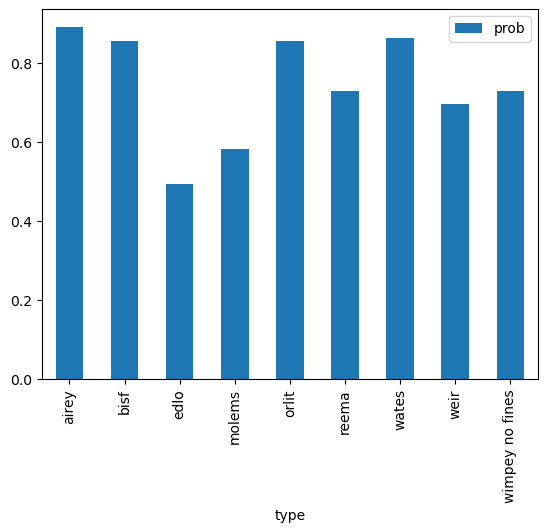

In [144]:
fc = facades.groupby('type').count()[['prob']]
cl = classified.groupby('type').count()[['prob']]

(fc / cl ).plot.bar()

In [145]:
# classified[classified['type']=='edlo'].groupby('label').count().sort_values('prob')

In [85]:
un_fac = classified[~classified['image_path'].isin(facades.image_path.tolist() )]

In [133]:
# question how to deal with  'balcony/exterior', and 'campus'
# start with excluding: try for cleanest read 
# that will just be a limitation of trying to find them 


data = classified[classified['type']=='edlo'].copy() 
label='campus'
label='house'
label='balcony/exterior'


base = '/Users/gracecolverd/Proj1/notebooks'

types = data[data['label']==label].image_path.tolist()


for p in types[0:15]:
    i_path = p.split('Non_Trads_FOI')[-1]
    print(i_path)
    img_path = base +  i_path
    print(img_path)
    img = Image.open(img_path)
    # input_img = V(centre_crop(img).unsqueeze(0))
    print(img.show())

/SVI_downloads/edlo/gsv_45.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/edlo/gsv_45.jpg
None
/SVI_downloads/edlo/gsv_43.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/edlo/gsv_43.jpg
None
/SVI_downloads/edlo/gsv_85.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/edlo/gsv_85.jpg
None
/SVI_downloads/edlo/gsv_19.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/edlo/gsv_19.jpg
None
/SVI_downloads/edlo/gsv_84.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/edlo/gsv_84.jpg
None
/SVI_downloads/edlo/gsv_10.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/edlo/gsv_10.jpg
None
/SVI_downloads/edlo/gsv_188.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/edlo/gsv_188.jpg
None
/SVI_downloads/edlo/gsv_160.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/edlo/gsv_160.jpg
None
/SVI_downloads/edlo/gsv_18.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/edlo/gsv_18.jpg
None
/SVI_downloads/edlo/gsv_66.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloa

In [135]:
classified[classified['label']=='oast_house']

,image_path,label,prob,type
8,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,oast_house,0.6987377405166626,reema
26,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,oast_house,0.5594335198402405,reema
44,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,oast_house,0.273489385843277,reema
48,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,oast_house,0.5163487792015076,reema
51,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,oast_house,0.7386488914489746,reema
...,...,...,...,...
7968,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,oast_house,tensor(0.8446),wimpey no fines
7969,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,oast_house,tensor(0.3714),wimpey no fines
7978,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,oast_house,tensor(0.3183),wimpey no fines
7992,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,oast_house,tensor(0.3850),wimpey no fines


In [134]:


#try and see what the second prob is 


base = '/Users/gracecolverd/Proj1/notebooks'



label='garage/outdoor' # to include 
label = 'industrial_area' # not include 
label ='residential_neighborhood' # not include 
label='balcony/exterior' # maybe 
label= 'campus' # probs not 
label ='slum' # include 
label ='parking_lot' # no 
label='barn' # no 
label ='courtyard' # maybe 
label='oast_house'

types = classified[classified['label']==label].image_path.tolist()


for p in types[15:25]:
    i_path = p.split('Non_Trads_FOI')[-1]
    print(i_path)
    img_path = base +  i_path
    print(img_path)
    img = Image.open(img_path)
    # input_img = V(centre_crop(img).unsqueeze(0))
    print(img.show())

/SVI_downloads/reema/gsv_1215.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_1215.jpg
None
/SVI_downloads/reema/gsv_8.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_8.jpg
None
/SVI_downloads/reema/gsv_509.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_509.jpg
None
/SVI_downloads/reema/gsv_130.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_130.jpg
None
/SVI_downloads/reema/gsv_828.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_828.jpg
None
/SVI_downloads/reema/gsv_633.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_633.jpg
None
/SVI_downloads/reema/gsv_551.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_551.jpg
None
/SVI_downloads/reema/gsv_427.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_427.jpg
None
/SVI_downloads/reema/gsv_1162.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_1162.jpg
None
/SVI_downloads/reema/gsv_625.jpg
/Users/gracec

In [152]:
facades.groupby('label').count()

,image_path,prob,type,probs_a
label,,,,
apartment_building/outdoor,202,202,202,202
beach_house,170,170,170,170
building_facade,94,94,94,94
cottage,202,202,202,202
courthouse,6,6,6,6
embassy,38,38,38,38
fire_station,29,29,29,29
garage/outdoor,337,337,337,337
hospital,51,51,51,51


In [ ]:

    # file_folder = p.split('SVI_downloads')[-1]
    file_name = p.split('/')[-1]
    file_type = p.split('/')[-2]
    file_loc = base +  file_folder
    print(file_folder)
    new_loc = os.path.join(base , new_folder, file_type )
    if os.path.exists(new_loc) is False:
        os.mkdir(new_loc) 

    new_file_loc = os.path.join(new_loc,  file_name) 
    
    print(new_loc)
# #     # # Get the filename from the file location
# #     # filename = os.path.basename(file_location)
    
    # # Create the destination path for the copy
    # destination = os.path.join(new_loc, file_name)
    # # Copy the file
    # shutil.copyfile(file_loc, destination)


/content/gdrive/MyDrive/Non_Trads_FOI/SVI_downloads/reema/gsv_256.jpg
/Users/gracecolverd/Proj1/Facades_SVI/reema
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_256.jpg
/content/gdrive/MyDrive/Non_Trads_FOI/SVI_downloads/reema/gsv_255.jpg
/Users/gracecolverd/Proj1/Facades_SVI/reema
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_255.jpg
/content/gdrive/MyDrive/Non_Trads_FOI/SVI_downloads/reema/gsv_254.jpg
/Users/gracecolverd/Proj1/Facades_SVI/reema
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_254.jpg
/content/gdrive/MyDrive/Non_Trads_FOI/SVI_downloads/reema/gsv_247.jpg
/Users/gracecolverd/Proj1/Facades_SVI/reema
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_247.jpg
/content/gdrive/MyDrive/Non_Trads_FOI/SVI_downloads/reema/gsv_249.jpg
/Users/gracecolverd/Proj1/Facades_SVI/reema
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_249.jpg
/content/gdrive/MyDrive/Non_Trads_FOI/SVI_downloads/reema/gsv_244.jpg
/Users/gracecolverd/

In [168]:
base = '/Users/gracecolverd/Proj1/notebooks'

label = 'synagogue/outdoor'
label='shed'
label='chalet'
label ='beach_house'

types = facades[facades['label']==label].image_path.tolist()


for p in types[0:15]:
    i_path = p.split('Non_Trads_FOI')[-1]
    print(i_path)
    img_path = base +  i_path
    print(img_path)
    img = Image.open(img_path)
    # input_img = V(centre_crop(img).unsqueeze(0))
    print(img.show())

/SVI_downloads/reema/gsv_445.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_445.jpg
None
/SVI_downloads/reema/gsv_723.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_723.jpg
None
/SVI_downloads/reema/gsv_656.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_656.jpg
None
/SVI_downloads/reema/gsv_1210.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_1210.jpg
None
/SVI_downloads/reema/gsv_556.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_556.jpg
None
/SVI_downloads/reema/gsv_581.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_581.jpg
None
/SVI_downloads/reema/gsv_1197.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_1197.jpg
None
/SVI_downloads/reema/gsv_997.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_997.jpg
None
/SVI_downloads/reema/gsv_985.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_985.jpg
None
/SVI_downloads/reema/gsv_673.jpg
/Users/gr

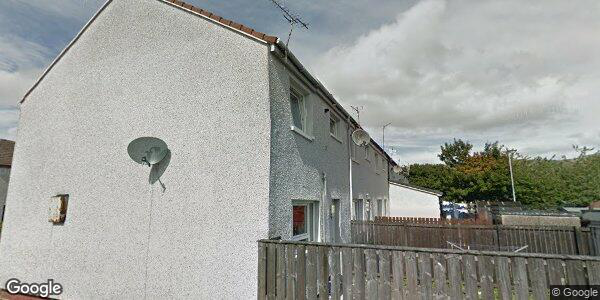

In [47]:
p = '/Users/gracecolverd/Proj1/notebooks/SVI_downloads/wimpey no fines/gsv_220.jpg'
img = Image.open(p)
# input_img = V(centre_crop(p).unsqueeze(0))
img

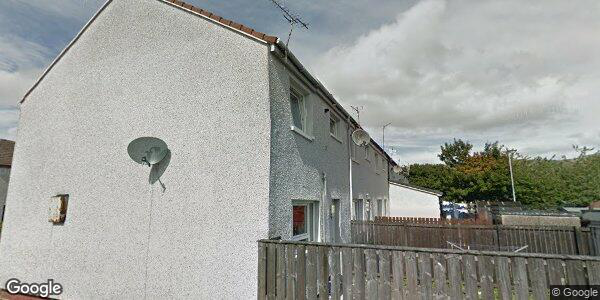

In [46]:
img

# multi label houess

In [205]:
df = pd.read_csv('/Users/gracecolverd/Proj1/classified_1.csv')

In [207]:
df.drop(columns=['Unnamed: 0', 'label', 'prob'], inplace=True) 

In [208]:
df

,image_path,label1,label2,label3,prob1,prob2,prob3
0,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,cottage,0.406592,0.216016,0.045117
1,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,motel,0.523646,0.127478,0.044473
2,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,cottage,0.538173,0.211420,0.057074
3,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,manufactured_home,shed,barn,0.179136,0.134349,0.124075
4,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,cottage,0.354163,0.256538,0.066727
...,...,...,...,...,...,...,...
8007,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,house,oast_house,cottage,0.259146,0.144715,0.126777
8008,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,beach_house,house,oast_house,0.219494,0.214976,0.160420
8009,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,industrial_area,residential_neighborhood,hospital,0.412237,0.327644,0.037960
8010,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,cottage,0.492159,0.219418,0.076281


In [216]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'manufactured_home'),
  Text(1, 0, 'hospital'),
  Text(2, 0, 'courtyard'),
  Text(3, 0, 'apartment_building/outdoor'),
  Text(4, 0, 'residential_neighborhood'),
  Text(5, 0, 'industrial_area'),
  Text(6, 0, 'park'),
  Text(7, 0, 'oast_house'),
  Text(8, 0, 'house'),
  Text(9, 0, 'building_facade'),
  Text(10, 0, 'embassy'),
  Text(11, 0, 'parking_lot'),
  Text(12, 0, 'mansion'),
  Text(13, 0, 'inn/outdoor'),
  Text(14, 0, 'museum/outdoor'),
  Text(15, 0, 'tower'),
  Text(16, 0, 'courthouse')])

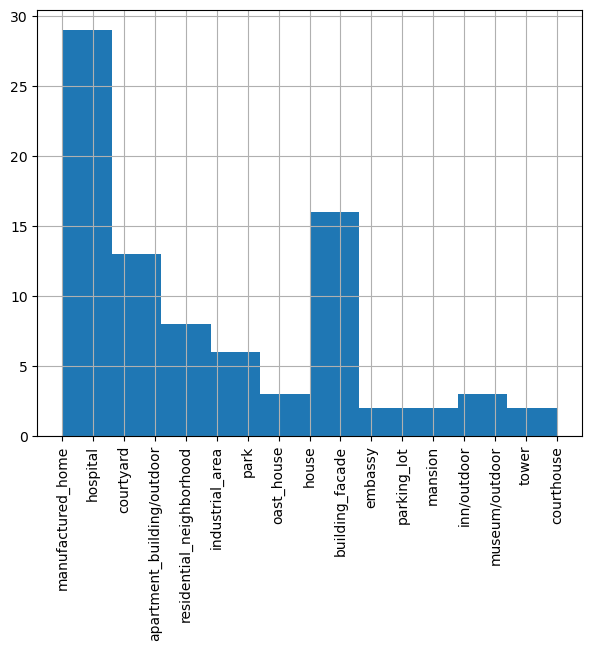

In [218]:
#take facades only 
df[df['label1']=='campus'].label2.hist()
plt.tight_layout()
plt.xticks(rotation=90)

<AxesSubplot: >

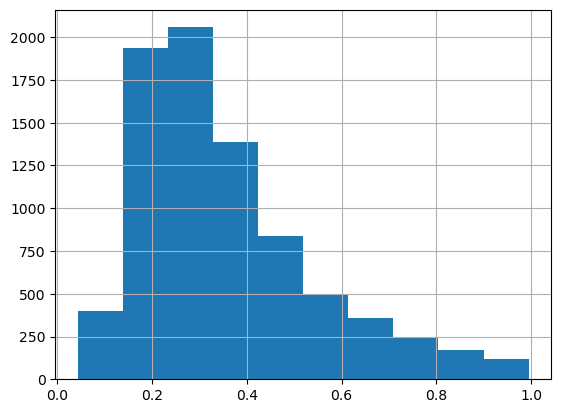

In [229]:
df.prob1.hist()

In [228]:
df[(df['label1']=='campus') & (df['label2'] ==l2)]

,image_path,label1,label2,label3,prob1,prob2,prob3
165,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,campus,courtyard,residential_neighborhood,0.239785,0.203797,0.090678
2595,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,campus,courtyard,manufactured_home,0.075711,0.060185,0.052118
2639,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,campus,courtyard,hospital,0.632392,0.149157,0.041313
2954,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,campus,courtyard,hospital,0.192313,0.183872,0.110450
4052,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,campus,courtyard,manufactured_home,0.123026,0.097202,0.089808
4058,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,campus,courtyard,residential_neighborhood,0.119817,0.095842,0.089294
5338,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,campus,courtyard,manufactured_home,0.264171,0.178561,0.106098


In [ ]:
inlcude if l1 = campus and l2 is building facade 

In [227]:
l2 = 'building_facade'
l2 = 'courtyard'
# l2 = 'manufactured_home'
types = df[(df['label1']=='campus') & (df['label2'] ==l2)].image_path.tolist()

for p in types[0:15]:
    i_path = p.split('Non_Trads_FOI')[-1]
    print(i_path)
    img_path = base +  i_path
    print(img_path)
    img = Image.open(img_path)
    # input_img = V(centre_crop(img).unsqueeze(0))
    print(img.show())

/SVI_downloads/reema/gsv_86.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_86.jpg
None
/SVI_downloads/molems/gsv_308.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/molems/gsv_308.jpg
None
/SVI_downloads/molems/gsv_268.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/molems/gsv_268.jpg
None
/SVI_downloads/edlo/gsv_152.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/edlo/gsv_152.jpg
None
/SVI_downloads/weir/gsv_206.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/weir/gsv_206.jpg
None
/SVI_downloads/weir/gsv_199.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/weir/gsv_199.jpg
None
/SVI_downloads/wimpey no fines/gsv_1195.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/wimpey no fines/gsv_1195.jpg
None


In [237]:

df.groupby('label1').count().sort_values('prob1', ascending = False).head(20)

,image_path,label2,label3,prob1,prob2,prob3
label1,,,,,,
inn/outdoor,1895,1895,1895,1895,1895,1895
house,1116,1116,1116,1116,1116,1116
residential_neighborhood,1006,1006,1006,1006,1006,1006
manufactured_home,859,859,859,859,859,859
oast_house,678,678,678,678,678,678
garage/outdoor,337,337,337,337,337,337
industrial_area,247,247,247,247,247,247
cottage,202,202,202,202,202,202
apartment_building/outdoor,202,202,202,202,202,202


In [ ]:
'balcony/exterior' with 'inn/outdoor'

In [239]:
l1 = 'balcony/exterior'
df[(df['label1']==l1)].groupby('label2').count()

,image_path,label1,label3,prob1,prob2,prob3
label2,,,,,,
apartment_building/outdoor,81,81,81,81,81,81
balcony/interior,1,1,1,1,1,1
beach_house,1,1,1,1,1,1
building_facade,2,2,2,2,2,2
campus,1,1,1,1,1,1
courtyard,2,2,2,2,2,2
fire_escape,1,1,1,1,1,1
house,1,1,1,1,1,1
inn/outdoor,9,9,9,9,9,9


In [244]:
l1 = 'balcony/exterior'


l2 = 'courtyard'
l2='apartment_building/outdoor'
l2 = 'inn/outdoor'
l2 = 'building_facade'
l2='shed'

# l2 = 'manufactured_home'
types = df[(df['label1']==l1) & (df['label2'] ==l2)].image_path.tolist()

for p in types[0:15]:
    i_path = p.split('Non_Trads_FOI')[-1]
    print(i_path)
    img_path = base +  i_path
    print(img_path)
    img = Image.open(img_path)
    # input_img = V(centre_crop(img).unsqueeze(0))
    print(img.show())

/SVI_downloads/bisf/gsv_109.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/bisf/gsv_109.jpg
None


In [262]:
#eclude l2 with  shed , 'synagogue/outdoor' palace, office_building 'hangar/outdoor' ,'cabin/outdoor'
exc = ['mansion','synagogue/outdoor', 'palace',   'office_building', 'hunting_lodge/outdoor', 'hangar/outdoor', 'shed', 'cabin/outdoor', 'chalet']
exc = ['chalet']
dff = df[df['label2'].isin(exc) ]
types = dff.image_path.tolist()

for p in types[0:35]:
    i_path = p.split('Non_Trads_FOI')[-1]
    print(i_path)
    img_path = base +  i_path
    print(img_path)
    img = Image.open(img_path)
    # input_img = V(centre_crop(img).unsqueeze(0))
    print(img.show())

/SVI_downloads/reema/gsv_246.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_246.jpg
None
/SVI_downloads/reema/gsv_172.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_172.jpg
None
/SVI_downloads/reema/gsv_990.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_990.jpg
None
/SVI_downloads/reema/gsv_872.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_872.jpg
None
/SVI_downloads/reema/gsv_650.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/reema/gsv_650.jpg
None
/SVI_downloads/bisf/gsv_637.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/bisf/gsv_637.jpg
None
/SVI_downloads/bisf/gsv_549.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/bisf/gsv_549.jpg
None
/SVI_downloads/bisf/gsv_501.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/bisf/gsv_501.jpg
None
/SVI_downloads/bisf/gsv_18.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/bisf/gsv_18.jpg
None
/SVI_downloads/molems/gsv_219.jpg
/Users/gracecolverd/Pr

In [266]:
l1 = 'oast_house'

df[df['label1']==l1].groupby('label2').count().sort_values('prob1')


,image_path,label1,label3,prob1,prob2,prob3
label2,,,,,,
amphitheater,1,1,1,1,1,1
parking_lot,1,1,1,1,1,1
palace,1,1,1,1,1,1
library/outdoor,1,1,1,1,1,1
lawn,1,1,1,1,1,1
windmill,1,1,1,1,1,1
tower,1,1,1,1,1,1
slum,1,1,1,1,1,1
fire_station,1,1,1,1,1,1


In [274]:
# excl; yard  barn museum/outdoor 

l2 = 'courtyard'
l2='apartment_building/outdoor'
l2 = 'inn/outdoor'
l2 = 'building_facade'
l2='museum/outdoor'
l2 = 'topiary_garden'
# l2= 'residential_neighborhood'
# l2 = 'manufactured_home'
types = df[(df['label1']==l1) & (df['label2'] ==l2)].image_path.tolist()

for p in types[0:15]:
    i_path = p.split('Non_Trads_FOI')[-1]
    print(i_path)
    img_path = base +  i_path
    print(img_path)
    img = Image.open(img_path)
    # input_img = V(centre_crop(img).unsqueeze(0))
    print(img.show())

/SVI_downloads/orlit/gsv_563.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/orlit/gsv_563.jpg
None
/SVI_downloads/airey/gsv_122.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/airey/gsv_122.jpg
None
/SVI_downloads/wimpey no fines/gsv_491.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/wimpey no fines/gsv_491.jpg
None
/SVI_downloads/wimpey no fines/gsv_369.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/wimpey no fines/gsv_369.jpg
None
/SVI_downloads/wimpey no fines/gsv_2013.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/wimpey no fines/gsv_2013.jpg
None
/SVI_downloads/wimpey no fines/gsv_3127.jpg
/Users/gracecolverd/Proj1/notebooks/SVI_downloads/wimpey no fines/gsv_3127.jpg
None


In [296]:
min_f = df[ (df['label1'].isin(targets))  & (df['label2'].isin(targets)) ]

extras = df[(df['label1']=='campus') & (df['label2']=='building_facade') ]

clean_facades = pd.concat([min_f, extras], axis=0)

In [297]:
clean_facades

,image_path,label1,label2,label3,prob1,prob2,prob3
0,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,cottage,0.406592,0.216016,0.045117
1,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,motel,0.523646,0.127478,0.044473
2,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,cottage,0.538173,0.211420,0.057074
4,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,cottage,0.354163,0.256538,0.066727
8,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,garage/outdoor,inn/outdoor,residential_neighborhood,0.190293,0.146664,0.125994
...,...,...,...,...,...,...,...
3055,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,campus,building_facade,hospital,0.357501,0.105408,0.097176
3068,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,campus,building_facade,hospital,0.357694,0.151112,0.100947
4849,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,campus,building_facade,courtyard,0.108650,0.107263,0.098726
4975,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,campus,building_facade,hospital,0.198768,0.129911,0.127622


In [287]:
min_f[min_f['label1']=='balcony/exterior']

,image_path,label1,label2,label3,prob1,prob2,prob3
84,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,balcony/exterior,apartment_building/outdoor,manufactured_home,0.196215,0.178758,0.083961
110,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,balcony/exterior,apartment_building/outdoor,building_facade,0.370188,0.158622,0.074090
682,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,balcony/exterior,apartment_building/outdoor,parking_garage/outdoor,0.285248,0.172990,0.123707
742,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,balcony/exterior,apartment_building/outdoor,garage/outdoor,0.180332,0.124921,0.061057
796,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,balcony/exterior,apartment_building/outdoor,residential_neighborhood,0.369927,0.111499,0.106079
...,...,...,...,...,...,...,...
7450,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,balcony/exterior,apartment_building/outdoor,building_facade,0.470585,0.241545,0.087246
7593,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,balcony/exterior,apartment_building/outdoor,inn/outdoor,0.477464,0.125040,0.102612
7629,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,balcony/exterior,apartment_building/outdoor,building_facade,0.480587,0.277023,0.071998
7755,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,balcony/exterior,apartment_building/outdoor,roof_garden,0.182108,0.133384,0.074961


In [ ]:
min_f

In [ ]:
#move clean facades 
file_locations = clean_facades.image_path.tolist()

import os
import shutil

base = '/Users/gracecolverd/Proj1'

# Create a new folder to store the copies
new_folder = 'Facades_SVI'
new_folder = os.path.join(base, new_folder)
if os.path.exists(new_folder) is False: 
    os.mkdir(new_folder)

# Copy each file into the new folder
for p in file_locations:
    print(p)

    file_name =    p.split('/')[-1]
    file_type =    p.split('/')[-2]
    file_loc = '/Users/gracecolverd/Proj1/notebooks' + '/SVI_downloads' + '/' +  file_type + '/' + file_name 
    
    new_f = os.path.join(new_folder, file_type)
    print(new_f)
    if os.path.exists(new_f) is False: 
        os.mkdir(new_f)
    
    new_file_loc = os.path.join(new_f, file_name) 
    print(file_loc)
    shutil.copyfile(file_loc, new_file_loc)


In [299]:
 min_f

,image_path,label1,label2,label3,prob1,prob2,prob3
0,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,cottage,0.406592,0.216016,0.045117
1,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,motel,0.523646,0.127478,0.044473
2,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,cottage,0.538173,0.211420,0.057074
4,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,cottage,0.354163,0.256538,0.066727
8,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,garage/outdoor,inn/outdoor,residential_neighborhood,0.190293,0.146664,0.125994
...,...,...,...,...,...,...,...
8005,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,cottage,0.426540,0.227773,0.060255
8006,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,inn/outdoor,house,oast_house,0.615093,0.111341,0.105902
8007,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,house,oast_house,cottage,0.259146,0.144715,0.126777
8008,/content/gdrive/MyDrive/Non_Trads_FOI/SVI_down...,beach_house,house,oast_house,0.219494,0.214976,0.160420


In [304]:
img.shape

AttributeError: shape